## Closed Root Finding Methods - Chapter 12, McClarren

We've been solving linear equations, or linear systems of equations, and now we are going to turn our attention to nonlinear equations.

Often this process is also called *root finding*, find $x$ so that

$$ f(x) = 0$$.

This is more challenging for non-linear functions because they may have many roots or not have any roots at all.  For a single-variable linear function, $f(x) = a + bx$, we know that there is a single root provided $b \ne 0$.  

Root finding almost always requires iteration: an initial guess is required and that guess is refined until the answer is *good enough*.  Closed method involve specifying an interview in which we know that the root resides, and subsequent shrinking of the interval to refine the guess.  

### Bisection

We start with two points $a$ and $b$ that bracket the root:  two points where

$$ f(a) f(b) < 0, $$

or two points where the values of $f(x)$ have different signs.  If the function is continuous in that interval, then it will go through zero [Intermediate Value Theorem.]

Once we have the points $a$ and $b$, we can then pick the midpoint of the interval and call it $c$:

$$ c = \frac{a+b}{2} $$.

Then, we can find which side of the interval the root is on by comparing the sign of $f(c)$ to the sign of the function at the endpoints.  After we know what side the root is on, we can change our interval to be that half of the original interval.  Or, if $f(a) f(c) < 0$, then $b = c$.  Otherwise, if $f(b) f(c) < 0$ $a = c$.  And, if we are so lucky that $f(a) f(c) = 0$ then c is the root!  If there are multiple roots, though, then it might be possible for $f(a) f(c) < 0$ and $f(b) f(c) < 0$, and in this case we could find a root no matter which half-interval we choose.   We can think about this as improving our estimate of the root by a factor of 2 each time.  

We can repeat this process of computing the sign of the function at the midpoint and shrinking the interval by a factor of 2 until the range is small enough that we can say we are done. Define the width of an interval after iteration $n$ as  $\Delta x_n = b − a$, with the initial interval width written as 
$\Delta x_0$. Using this definition and the fact that each iteration cuts the interval in half, we know that after $n$ iterations the width of the interval is

$$ \Delta x_n = 2^{-n} \Delta x_0.$$

If we want to know the root within a tolerance $\varepsilon$, then we can solve for $n$ in the equation:

$$ \varepsilon =  2^{-n} \Delta x_0, $$

$$ n = \frac{\log{(\Delta x_0/\varepsilon)}}{\log{2}} $$



In [18]:
def bisection(f,a,b,epsilon=1.0e-6):
    """Find the root of the function f via bisection
    where the root lies within [a,b]
    Args:
        f: function to find root of
        a: left-side of interval
        b: right-side of interval
        epsilon: tolerance
    Returns:
        estimate of root
    """
    import numpy as np
    assert (b>a)
    fa = f(a)
    fb = f(b)
    assert (fa*fb < 0)
    delta = b - a
    print("We expect",
          int(np.ceil(np.log(delta/epsilon)/np.log(2))),"iterations")
    iterations = 0
    while (delta > epsilon):
        c = (a+b)*0.5
        fc = f(c)
        if (fa*fc < 0):
            b = c
            fb = fc
        elif (fb*fc < 0):
            a = c
            fa = fc
        else:
            return c
        delta = b-a
        iterations += 1
    print("It took",iterations,"iterations")
    return c #return midpoint of interval

Notice that we save the value of the function evaluations so that we only evaluate the function
at a given point once. This will be important if it takes a long time to evaluate the function.
For example, if the function evaluation involves the solution of a system of equations, as done
in one of the exercises for this chapter, one does not want to be evaluating the function more
times than necessary.

Let's test it with a simple cubic, to find a single root:

In [19]:
def nonlinear_function(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20
root = bisection(nonlinear_function,1,2)
print("The root estimate is",root,"\nf(",root,
      ") =",nonlinear_function(root))

We expect 20 iterations
It took 20 iterations
The root estimate is 1.9473047256469727 
f( 1.9473047256469727 ) = -1.883242441280686e-05


Bisection is a useful algorithm because it is really easy to implement, and we know how
long it should take to converge. Also, we know that it will converge. We can give it a really
big range and as long as the root is in the range, it will find it. In this case we increase the
initial interval from a width of 3 to 7. Bisection has no trouble finding the root.

In [20]:
root = bisection(nonlinear_function,-5,2)
print("The root estimate is",root,"\nf(",root,
      ") =",nonlinear_function(root))

We expect 23 iterations
It took 23 iterations
The root estimate is 1.9473060369491577 
f( 1.9473060369491577 ) = 2.9577188165319512e-05


What about a nuclear example?  

An example problem that we will use to compare root finding methods is that of finding
the critical radius of a bare sphere reactor. From elementary nuclear reactor theory, one
can show that for a critical, spherical reactor

$$ \left(\frac{\pi}{R+2D}\right)^2 = \frac{\nu \Sigma_f - \Sigma_a}{D}, $$

where $D$ [cm] is the diffusion coefficient, $\nu$ is the number of neutrons born per fission,
$\Sigma_f$ [cm$^{−1}$] is the fission macroscopic cross-section, $\Sigma_a$ [cm$^{−1}$] is the macroscopic cross-section for absorption, and $R$ [cm] is the radius of the reactor. Therefore, given $D$, $\nu \Sigma_f$ and $\Sigma_a$ we can compute the critical radius. To use bisection we need to define the function we want to
be zero:

$$ f(R) = \left(\frac{\pi}{R+2D}\right)^2 - \frac{\nu \Sigma_f - \Sigma_a}{D}. $$

We will solve the problem with $D = 9.21$ cm, $\nu \Sigma_f  = 0.1570 $cm $^{−1}$, and $\Sigma_a = 0.1532$ cm$^{−1}$. For the initial interval we will pick $a = 0$ and $b = 250$ cm, because $f(R)$ has different signs
at these points. In the code below we define a simple function and pass it to our bisection algorithm.
Notice that this function has all the arguments except for R have default arguments.
This is because the bisection algorithm we defined earlier operates on a function of only a
single variable.  The bisection algorithm finds the critical radius in 28 iterations.


In [21]:
#first define the function
def Crit_Radius(R, D=9.21, nuSigf = 0.1570, Siga = 0.1532):
    import numpy as np
    return (np.pi/(R + 2*D))**2 - (nuSigf - Siga)/D
a = 0
b = 250
Radius = bisection(Crit_Radius,a,b)
print("The critical radius estimate is",Radius,
      "\nf(",Radius,") =",Crit_Radius(Radius))

We expect 28 iterations
It took 28 iterations
The critical radius estimate is 136.2435193732381 
f( 136.2435193732381 ) = 2.175801910603986e-12


### False Position (Regula Falsi)

Another closed root finding method is the false position method (also called regula falsi, if
one prefers Latin names). Thismethod draws a line between the two endpoints of the interval
[$a, b$] and uses the position where that line intersects the $x$ axis as the value of $c$ (the guess for
the new endpoint). Below is a graphical example:

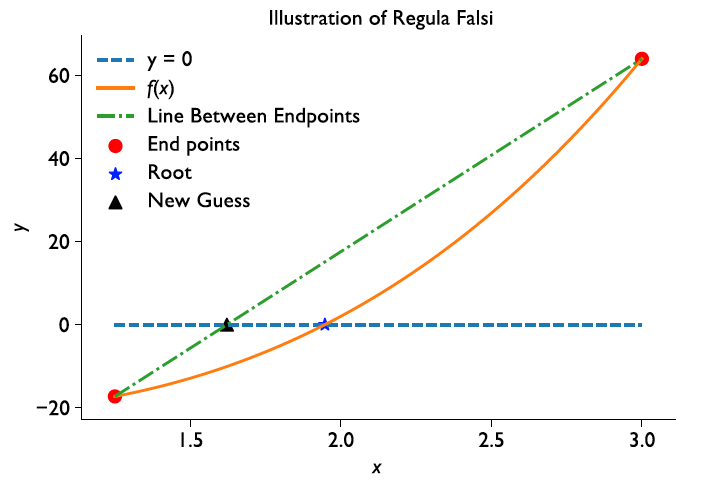

The false position methods works in almost the exact same way as bisection except that $c$
is not directly in the middle of the interval, rather it is where the interpolating line intersects
the $x$ axis. The reason this may be a good idea, is that if the function is linear (or near linear)
in the interval, this value of $c$ will be the root.

To derive false position, we first define the slope between the two endpoints:

$$ m = \frac{ f(b) - f(a) }{b-a} $$

For a line the slope is the same everywhere so we know that

$$ \frac{ f(b)-f(a) }{b-a} = \frac{f(c)-f(a)}{c-a}.$$

We also want $f(c)$ to be zero, so this simplifies to

$$ \frac{ f(b)-f(a) }{b-a} = \frac{-f(a)}{c-a}.$$

Solving for $c$ gives

$$ c = a - \frac{f(a)}{m}. $$

We have to use a different convergence criterion than we did for bisection as the interval size
is not the best measure in false position because after each iteration our guess is $c$. In this case
we will use $\left| f(c) \right| < \varepsilon$ for our convergence criteria.

A Python implementation of this algorithm is below.


In [22]:
def false_position(f,a,b,epsilon=1.0e-6):
    """Find the root of the function f via false position where the root lies within [a,b]
    Args:
        f: function to find root of
        a: left-side of interval
        b: right-side of interval
        epsilon: tolerance
    Returns:
        estimate of root
    """
    import numpy as np
    assert (b>a)
    assert (f(a)*f(b) < 0)
    delta = b - a
    iterations = 0
    residual = 1.0
    while (np.fabs(residual) > epsilon):
        m = (f(b)-f(a))/(b-a)
        c = a - f(a)/m
        if (f(a)*f(c) < 0):
            b=c
        elif (f(b)*f(c) < 0):
            a=c
        else:
            print("It took",iterations,"iterations")
            return c
        residual = f(c)
        iterations += 1
    print("It took",iterations,"iterations")
    return c #return c

In [23]:
root = false_position(nonlinear_function,1,2)
print("The root estimate is",root,"\nf(",root,
      ") =",nonlinear_function(root))

It took 5 iterations
The root estimate is 1.9473052141477751 
f( 1.9473052141477751 ) = -7.983476244532994e-07


This is faster than bisection on this short interval because bisection took 20 iterations. This
factor of 4 improvement is impressive. If we give it a bigger interval, it is still faster than
bisection by a factor of 3.


In [24]:
root = false_position(nonlinear_function,-5,2)
print("The root estimate is",root,"\nf(",root,") =",
      nonlinear_function(root))

It took 9 iterations
The root estimate is 1.947305257431454 
f( 1.947305257431454 ) = 7.995646100766862e-07


Finally, we apply it on the critical slab case (bisection took 28 iterations for this problem
and initial interval).


In [25]:
a = 0
b = 250
Radius = false_position(Crit_Radius,a,b)
print("The critical radius estimate is",Radius,"\nf(",Radius,
      ") =",Crit_Radius(Radius))

It took 260 iterations
The critical radius estimate is 136.42803805393132 
f( 136.42803805393132 ) = -9.827177585040653e-07


### What happened? 

False position was much faster on the cubic function, but is now 9 times
slower than bisection. It is important to note that it still converged (that’s good), but it converged
slowly (that’s bad). To see why, we can look at the first iteration by plotting the
function and the false position update:

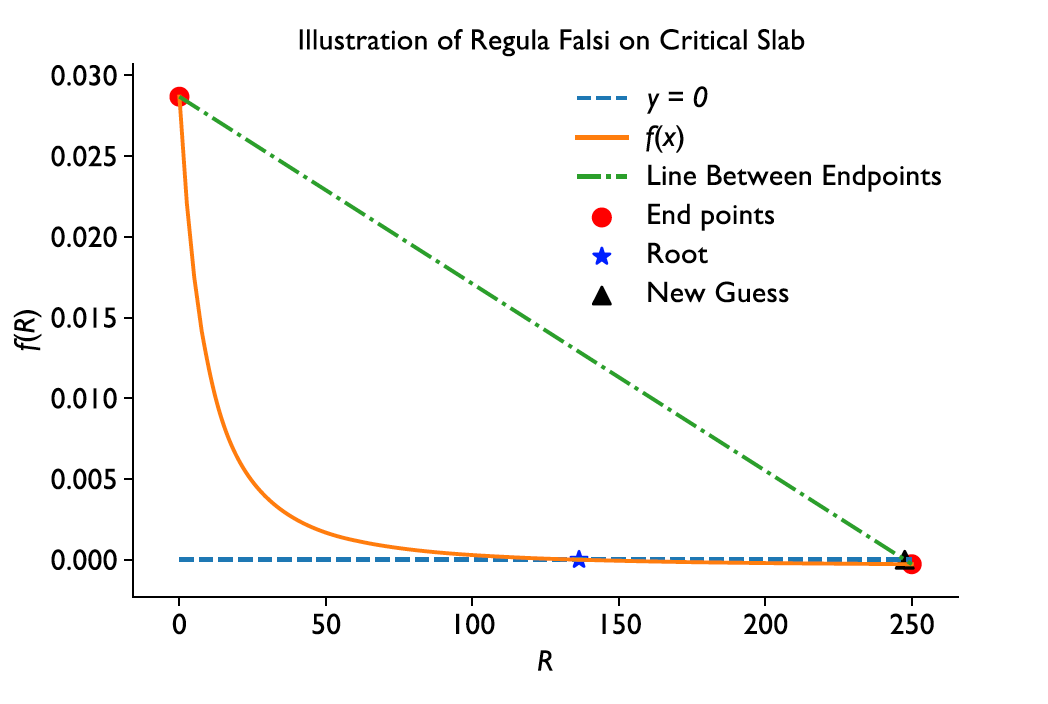

Notice how the function is very steep near 0 and much less steep to the right of the root.
This makes the value of $c$ very close to $b$. Since the right endpoint moves so slowly, it takes
a long time to converge. If we gave it a better initial range, it should work better. With the
minimum value of the initial interval shifted to $R = 100$ we get:

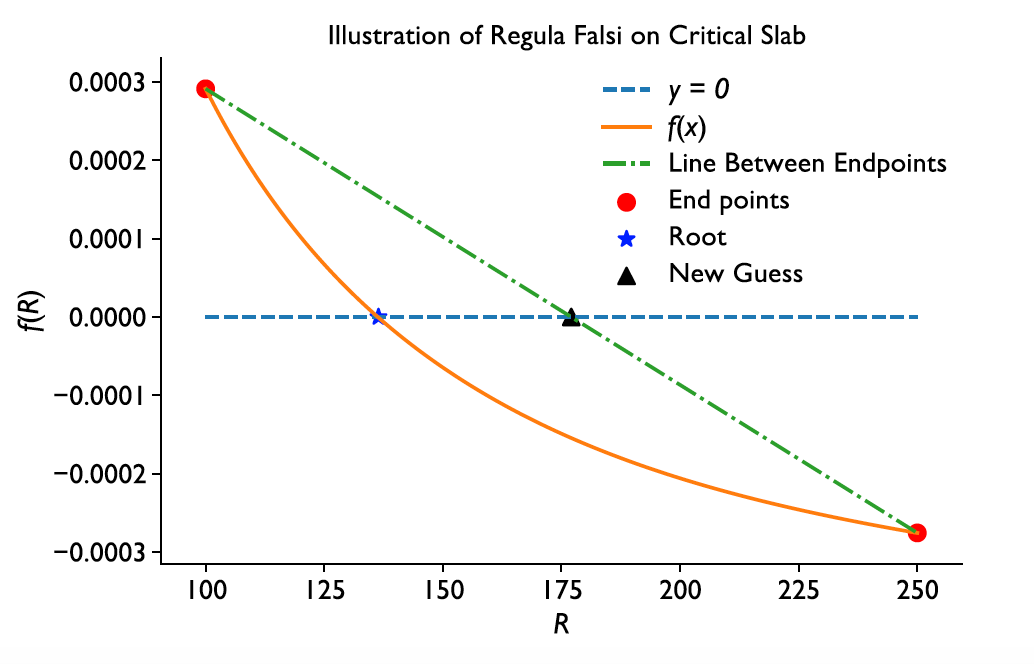

In [26]:
a = 100
b = 250
Radius = false_position(Crit_Radius,a,b)
print("The critical radius estimate is",Radius,"\nf(",Radius,
      ") =",Crit_Radius(Radius))

It took 6 iterations
The critical radius estimate is 136.42658989359794 
f( 136.42658989359794 ) = -9.750187400692396e-07


This demonstrates that when we tried to get better than bisection we sometimes are slower.
Bisection is the tank of nonlinear solvers: it is slow, but it will get there. Regula falsi can be
faster than the tank, but it can also be slowed down in the mud. There is a lot of mud in the
realm of solving nonlinear equations.

### Ridder's Method

An obvious way to quantify the speed of a rootfinding method is the number of iterations.
This, however, is not a perfect comparison between methods because the number of function
evaluations per iteration may differ between methods. For both bisection and false position,
the number of additional function evaluations needed is one, at $x = c$. This will not always
be the case. The next method requires an extra function evaluation in each iteration.